### Exercise X: Make an animation of a plate reconstruction



In [2]:
# Before we do anything, import the python modules that we're going to use
import pygplates

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

# This is a 'magic' command that makes figures you create appear within the browser
%matplotlib inline


Enter some code to load a rotation model and a polygon geometry of your choice into the python session

In [3]:
# Names of input files
input_feature_filename = '../pygplates-tutorials-OFFICIAL/Data/Seton_etal_ESR2012_Coastlines_2012.1_Polygon.gpmlz'
input_rotation_filename = '../pygplates-tutorials-OFFICIAL/Data/Seton_etal_ESR2012_2012.1.rot'

# Input parameters to define how the reconstruction is made
reconstruction_time = 120.6
anchor_plate = 0

# Name of ouput file
output_reconstructed_feature_filename = './tmp.shp'

# Use pygplates to carry out the reconstruction 
pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename, reconstruction_time, anchor_plate)


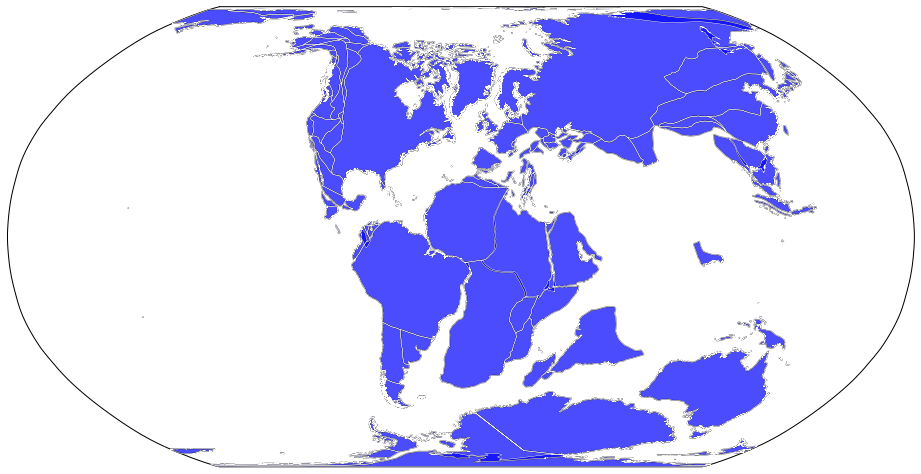

In [4]:
fig = plt.figure(figsize=(14,10))
ax_map = fig.add_axes([0,0,0.9,1.0])
m = Basemap(projection='robin', lon_0=0, resolution='c', ax=ax_map)

shp_info = m.readshapefile('./tmp','shp',drawbounds=True,color='w')
    
for nshape,seg in enumerate(m.shp):
    poly = Polygon(seg,facecolor='blue',edgecolor='k',alpha=0.7)
    ax_map.add_patch(poly)

plt.show()

This has replicated the first few steps in the 'pygplates-getting-started' tutorials

For those new to python, note that even this code demonstrates a few important concepts:
1. 'objects'
2. 'for' loops, and how the indentation of the code blocks controls which sections are within the loop 
3. the enumerate function - when iterating over a list of things, we can also generate an index that is like a counter for the number of the iteration


## Exercise

Building to do the following
1. Create a series of reconstruction images at different times
2. Try to add a different polygon feature within the Seton et al (2012) dataset, so that the images plot both sets of features together
3. Label the plots, so that we can see the time of each one
4. Save the plots to an image format of your choice
5. Try making an animation movie file
6. Try a different reconstruction model - note, you'll need to change the polygon files as well as the rotation file


0
20
40
60
80
100
120
140
160
180


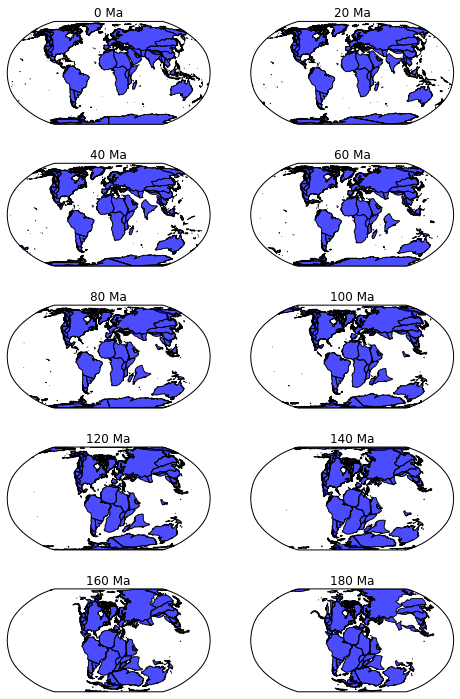

In [12]:
# Solution #1 - plot a series of reconstructions as subplots within a single figure

# Name of ouput file
output_reconstructed_feature_filename = './tmp.shp'

fig = plt.figure(figsize=(8,25))

for i,reconstruction_time in enumerate(range(0,200,20)):

    print(reconstruction_time)
    
    ax_map = plt.subplot(10,2,i+1)
    m = Basemap(projection='robin', lon_0=0, resolution='c', ax=ax_map)

    # Use pygplates to carry out the reconstruction 
    pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename, reconstruction_time, anchor_plate)

    shp_info = m.readshapefile('./tmp','shp',drawbounds=True,color='k')

    for nshape,seg in enumerate(m.shp):
        poly = Polygon(seg,facecolor='blue',edgecolor='k',alpha=0.7)
        ax_map.add_patch(poly)

    plt.title('%s Ma' % reconstruction_time)

plt.show()


In [ ]:
# Solution #1 - plot a series of reconstructions that you dump into png files - note the dynamic naming
# of the files based on the reconstruction time

# Name of ouput file
output_reconstructed_feature_filename = './tmp.shp'

for i,reconstruction_time in enumerate(range(0,101,5)):

    print(reconstruction_time)
    
    # set up the figure, needs to happen for each iteration in this case
    fig = plt.figure(figsize=(12,7))
    ax_map = fig.add_axes([0,0,0.9,1.0])
    m = Basemap(projection='robin', lon_0=0, resolution='c', ax=ax_map)

    # Use pygplates to carry out the reconstruction 
    pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename, reconstruction_time, anchor_plate)

    shp_info = m.readshapefile('./tmp','shp',drawbounds=True,color='k')

    for nshape,seg in enumerate(m.shp):
        poly = Polygon(seg,facecolor='blue',edgecolor='k',alpha=0.7)
        ax_map.add_patch(poly)

    plt.title('%s Ma' % reconstruction_time)
    
    # save the figure to a file
    plt.savefig('images/%dMa_reconstruction.png' % reconstruction_time,format='png')



0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75